# Full image size and ROI percentage visualization

In [ ]:
#install and load the library
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
unzip("/content/percentage_pixel_metadata_pathylogy.zip", exdir = "/content")

# full image pixel

In [ ]:
# Read the CSV file into a data frame
df <- read.csv("/content/heaght_width_FULL.csv")

In [ ]:
dim(df)

[1] 1592    5

In [ ]:
head(df)

,X,Subject_ID,Width,Height,pathology
,<int>,<chr>,<int>,<int>,<chr>
1,404,test_Mass-Test_P_00016_LEFT_CC__1-1,1846,4006,MALIGNANT
2,1034,test_Mass-Test_P_00016_LEFT_MLO__1-1,2011,5491,MALIGNANT
3,605,test_Mass-Test_P_00017_LEFT_CC__1-1,3200,5904,MALIGNANT
4,475,test_Mass-Test_P_00017_LEFT_MLO__1-1,3352,5952,MALIGNANT
5,998,test_Mass-Test_P_00032_RIGHT_CC__1-1,2641,5116,BENIGN
6,1510,test_Mass-Test_P_00032_RIGHT_MLO__1-1,2671,5206,BENIGN


In [ ]:
df_processed <- df %>%
  mutate(pathology_processed = case_when(
    pathology == "MALIGNANT" ~ "Malignant",
    pathology == "BENIGN_WITHOUT_CALLBACK" ~ "Benign",
    pathology == "BENIGN" ~ "Benign",
    TRUE ~ as.character(pathology)
  ))

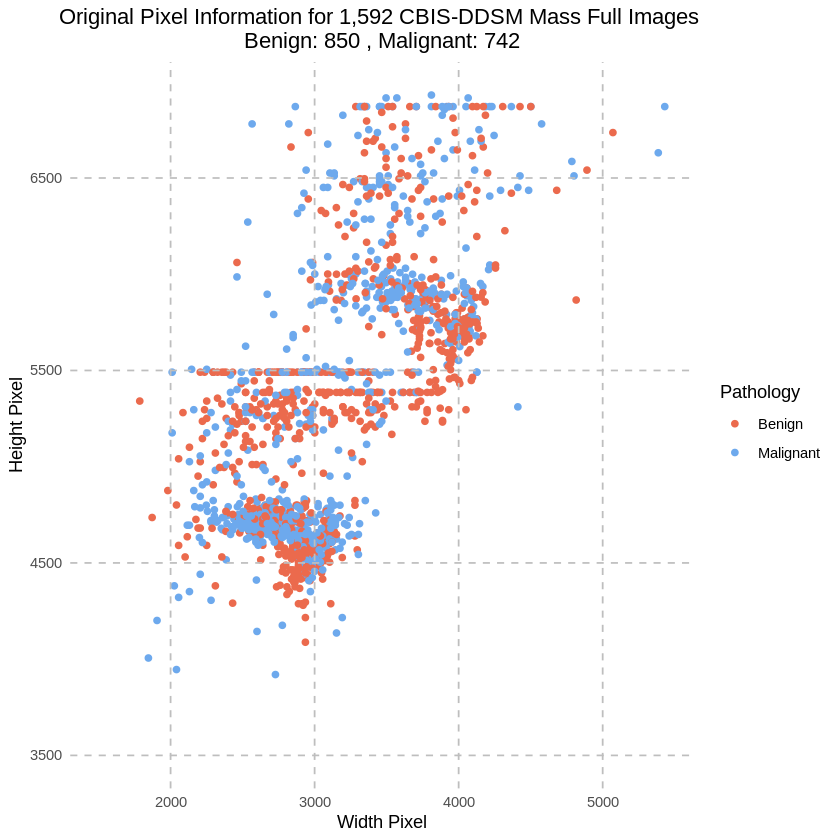

In [ ]:
# Calculate the total number of dots
total_dots <- nrow(df_processed)
# Format the total_dots with commas every 1000
formatted_total_dots <- format(total_dots, big.mark = ",")

# Calculate the counts for benign and malignant
benign_count <- sum(df_processed$pathology_processed == "Benign")
malignant_count <- sum(df_processed$pathology_processed == "Malignant")

# Create the dot plot with custom gridlines, axis lines, and truncated axes
full_pixel <- ggplot(df_processed, aes(x = Width, y = Height, color = pathology_processed)) +
  geom_point() +
  labs(x = "Width Pixel", y = "Height Pixel", color = "Pathology") +
  scale_color_manual(values = c("#eb6a4d", "#6da9ed")) +
  scale_linetype_manual(values = c("solid", "dashed")) +
  scale_x_continuous(breaks = seq(2000, max(df_processed$Width), by = 1000)) +
  scale_y_continuous(breaks = seq(1500, max(df_processed$Height), by = 1000)) +
  geom_hline(yintercept = 0, color = "grey") +  # Horizontal axis line
  geom_vline(xintercept = 0, color = "grey") +  # Vertical axis line
  geom_hline(yintercept = seq(1500, max(df_processed$Height), by = 1000), color = "grey", linetype = "dashed") +  # Horizontal gridlines
  geom_vline(xintercept = seq(2000, max(df_processed$Width), by = 1000), color = "grey", linetype = "dashed") +  # Vertical gridlines
  coord_cartesian(xlim = c(1500, max(df_processed$Width)), ylim = c(3500, max(df_processed$Height))) +  # Truncate axes
  theme_minimal() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    plot.title = element_text(hjust = 0.5)
  ) +
  ggtitle(paste("Original Pixel Information for", formatted_total_dots, "CBIS-DDSM Mass Full Images \nBenign:", benign_count, ", Malignant:", malignant_count))

full_pixel


In [ ]:
# Save the plot as a PDF with specified dimensions and resolution
ggsave("full_pixel.pdf", full_pixel, width = 7, height = 5.7, dpi = 1000)

# ROI percentage

In [ ]:
# Read the CSV file into a data frame
roi <- read.csv("/content/content/metadata/598_percentage_all.csv")

In [ ]:
roi_processed <- roi %>%
  mutate(pathology_processed = case_when(
    pathology == "MALIGNANT" ~ "Malignant",
    pathology == "BENIGN_WITHOUT_CALLBACK" ~ "Benign",
    pathology == "BENIGN" ~ "Benign",
    TRUE ~ as.character(pathology)
  ))

In [ ]:
dim(roi_processed)

[1] 1696    6

In [ ]:
head(roi_processed)

,X,name,file_path,area_percentage,pathology,pathology_processed
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,0,Mass-Test_P_00016_LEFT_CC_1_,/content/test_598_same/Mass-Test_P_00016_LEFT_CC_1__1-1.png,20.860225,MALIGNANT,Malignant
2,1,Mass-Test_P_00016_LEFT_MLO_1_,/content/test_598_same/Mass-Test_P_00016_LEFT_MLO_1__1-1.png,15.106934,MALIGNANT,Malignant
3,2,Mass-Test_P_00017_LEFT_CC_1_,/content/test_598_same/Mass-Test_P_00017_LEFT_CC_1__1-2.png,5.046364,MALIGNANT,Malignant
4,3,Mass-Test_P_00017_LEFT_MLO_1_,/content/test_598_same/Mass-Test_P_00017_LEFT_MLO_1__1-2.png,5.825718,MALIGNANT,Malignant
5,4,Mass-Test_P_00032_RIGHT_CC_1_,/content/test_598_same/Mass-Test_P_00032_RIGHT_CC_1__1-2.png,19.941891,BENIGN,Benign
6,5,Mass-Test_P_00032_RIGHT_MLO_1_,/content/test_598_same/Mass-Test_P_00032_RIGHT_MLO_1__1-2.png,27.566246,BENIGN,Benign


In [ ]:
# Perform Mann-Whitney U test between benign and malignant groups for area_percentage
wilcox_test_result <- wilcox.test(area_percentage ~ pathology_processed, data = roi_processed)

# Get the p-value from the Mann-Whitney U test result
p_value_wilcox <- wilcox_test_result$p.value

# Print the p-value
print(p_value_wilcox)

[1] 2.806886e-15


In [ ]:
# Calculate summary statistics
summary_stats <- roi_processed %>%
  group_by(pathology_processed) %>%
  summarise(
    count = n(),  # Total count
    median = median(area_percentage),
    # mean = mean(area_percentage),  # Calculate mean
    q1 = quantile(area_percentage, 0.25),
    q3 = quantile(area_percentage, 0.75)
  )

In [ ]:
summary_stats

pathology_processed,count,median,q1,q3
<chr>,<int>,<dbl>,<dbl>,<dbl>
Benign,915,14.50823,9.229063,22.21759
Malignant,781,18.56579,11.636056,31.19260


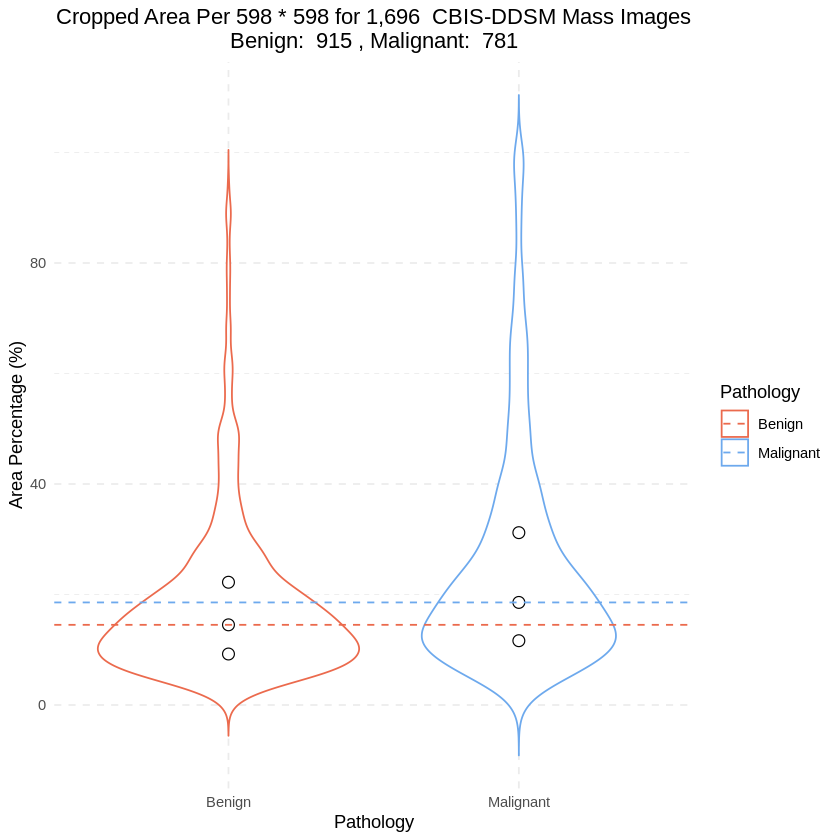

In [ ]:
# Calculate summary statistics
summary_stats <- roi_processed %>%
  group_by(pathology_processed) %>%
  summarise(
    count = n(),  # Total count
    median = median(area_percentage),
    q1 = quantile(area_percentage, 0.25),
    q3 = quantile(area_percentage, 0.75)
  )

# Calculate the total number of dots
total_dots_ROI <- nrow(roi_processed)
# Format the total_dots with commas every 1000
formatted_total_dots_ROI <- format(total_dots_ROI, big.mark = ",")


# Get counts for malignant and benign
malignant_count <- summary_stats$count[summary_stats$pathology_processed == "Malignant"]
benign_count <- summary_stats$count[summary_stats$pathology_processed == "Benign"]

# Create the violin plot with summary statistics and annotations
ROI_area <- ggplot(roi_processed, aes(x = pathology_processed, y = area_percentage, color = pathology_processed)) +
  geom_violin(trim = FALSE) +  # Create violin plot without trimming
  stat_summary(fun.data = function(x) {
    median <- median(x)
    q1 <- quantile(x, 0.25)
    q3 <- quantile(x, 0.75)
    data.frame(y = c(median, q1, q3), label = c("Median", "1st Quartile", "3rd Quartile"))
  }, geom = "point", shape = 21, size = 3, color = "black") +  # Add summary statistics as points
  geom_hline(data = summary_stats, aes(yintercept = median, color = pathology_processed), linetype = "dashed", size = 0.5) +  # Add horizontal lines at medians
  labs(x = "Pathology", y = "Area Percentage (%)", color = "Pathology") +
  scale_color_manual(values = c("#eb6a4d", "#6da9ed")) +  # Customize colors
  theme_minimal() +
  theme(
    panel.grid.major = element_line(linetype = "dashed"),  # Set major grid lines to dash line
    panel.grid.minor = element_line(linetype = "dashed"),   # Set minor grid lines to dash line
    axis.text.x = element_text(angle = 0, hjust = 0.5),  # Rotate x-axis labels for better readability
    plot.title = element_text(hjust = 0.5) # Set axis line to dash line
  ) +
  # Create the title with reversed order of "Benign" and "Malignant"
  ggtitle(paste("Cropped Area Per 598 * 598 for",formatted_total_dots_ROI," CBIS-DDSM Mass Images\nBenign: ", benign_count,", Malignant: ", malignant_count))
ROI_area

In [ ]:
# Save the plot as a PDF with specified dimensions and resolution
ggsave("Cropped_area.pdf", ROI_area, width = 6.27, height = 5.7, dpi = 1000)